<a href="https://colab.research.google.com/github/SAHILLNEGII/SAHILLNEGII/blob/main/predictive_insurance_premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('/insurance.csv')

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
data.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [9]:
data.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


#Converting the binary categorical variables into 1 and 0 (binary)

In [10]:
data['sex'] = data['sex'].map({'female':0,'male':1})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [11]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


<ipython-input-13-43435797af3c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='children', y='region', inner='box', palette='Dark2')


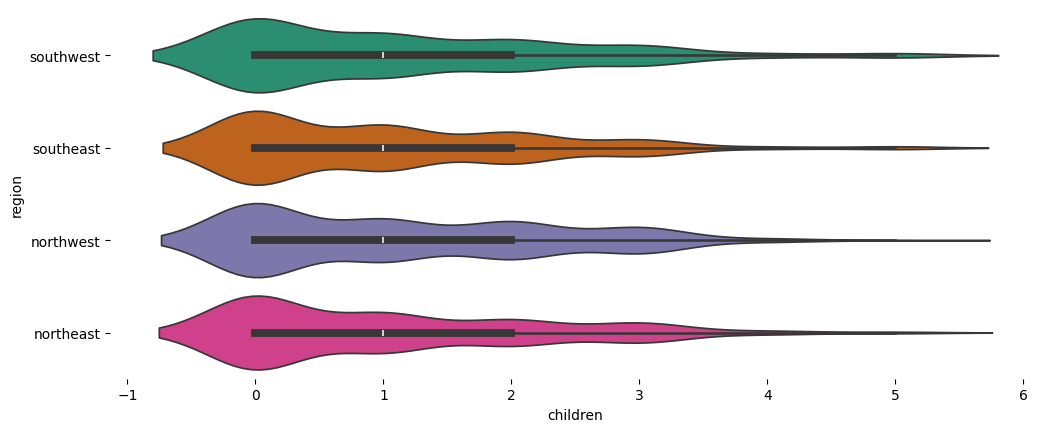

In [13]:
# @title region vs children

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='children', y='region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

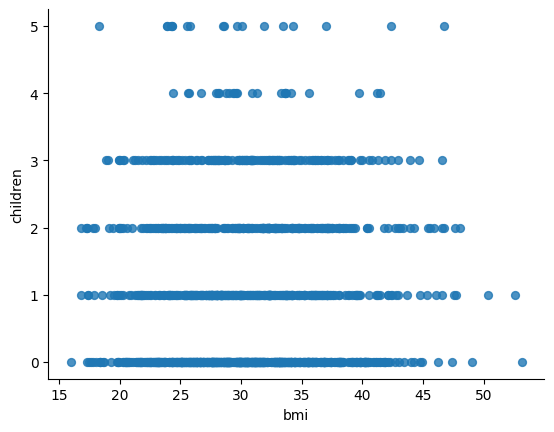

In [12]:
# @title bmi vs children

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# | One hot Encoding the categorical variables | or Dummifying |

In [17]:
data = pd.get_dummies(data, columns=['region'])

In [18]:
for column in data.columns:
  if data[column].dtype == bool:
    data[column] = data[column].astype(int)

### OR

data = pd.get_dummies(data.region, dtype = int)

In [19]:
data

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [20]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0
region_northeast,0
region_northwest,0
region_southeast,0
region_southwest,0


<Axes: >

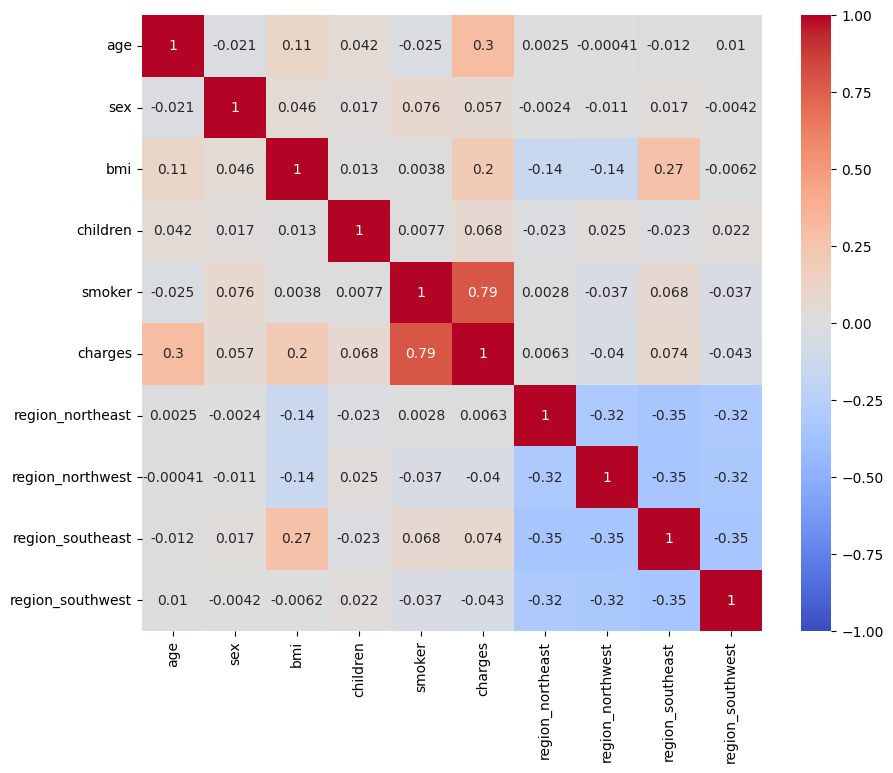

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax=1)

In [27]:
X = data.drop(['charges'], axis = 1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [29]:
model.score(X_test, y_test)

0.8806545151568569

In [30]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 4357.917221


In [31]:
data.charges.std()

12110.011236693994

In [32]:
y_test.std()

12638.273406220218

In [33]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))

MAE: 2605.502731


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

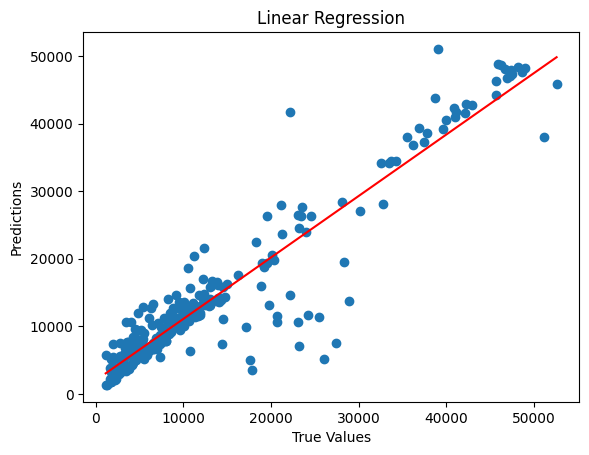

In [35]:
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt

In [37]:
feature_importances = sorted(zip(model.feature_names_in_,model.feature_importances_), key=lambda x: x[1], reverse=True)

Text(0.5, 1.0, 'Random Forest Feature Importance')

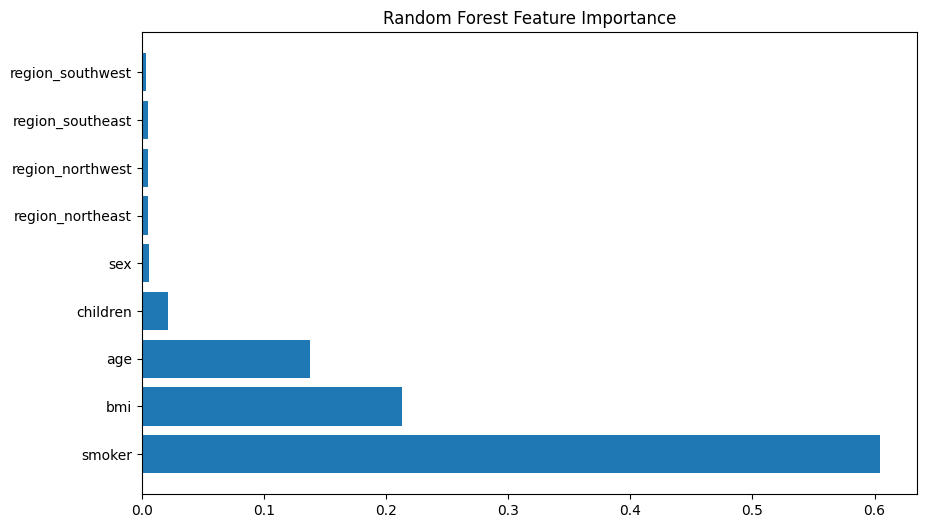

In [40]:
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title("Random Forest Feature Importance")

In [45]:
param_grid = {
    'max_depth': [None, 2, 3, 4],
    'min_samples_split': [2, 4,],
    'min_samples_leaf': [1, 2, 4, 6],
}

model = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4]})

In [47]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [48]:
model = grid_search.best_estimator_

In [49]:
model

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=4,
                      n_jobs=-1)

In [50]:
model.score(X_test, y_test)

0.9014402318930552

In [51]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 3960.279306


In [52]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))

MAE: 2399.987075


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

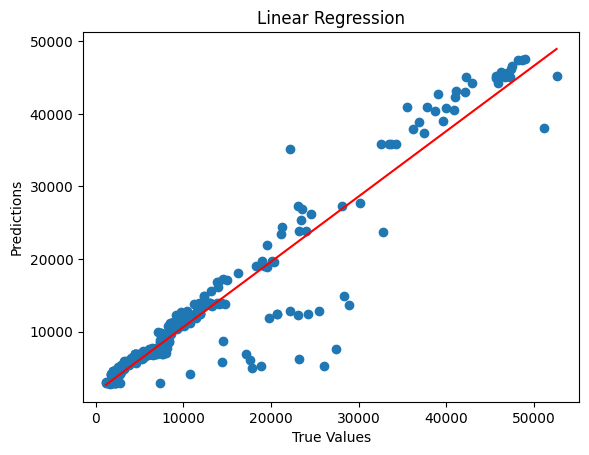

In [53]:
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt